<a href="https://colab.research.google.com/github/yasnilamw/MSIB-K2-KelasAwanPintar/blob/main/30_09_2401_Hierarchical_Clustering_Diaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Hierarchical Clustering: Agglomerative Hierarchical Clustering (AHC)

## Import Library

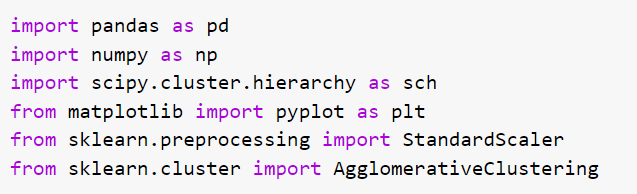

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as pit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

## Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on kali ini, kita akan membuat customer segmentation dari dataset customer sebuah toko kredit di Mall.

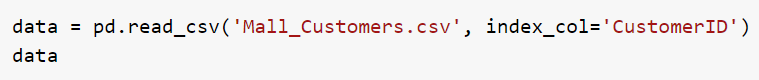

In [ ]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

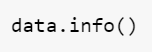

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan SpendingScore.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

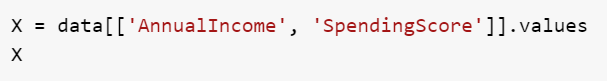

In [ ]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

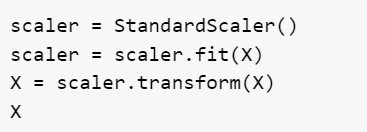

In [ ]:
scaler = StandardScaler()
scaler  = scaler.fit(X)
X = scaler.transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

---

## Membentuk Dendogram



Pilih metode complete linkage!

**FYI**, metode complete linkage bisa diubah dengan:
- single
- average

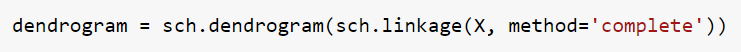

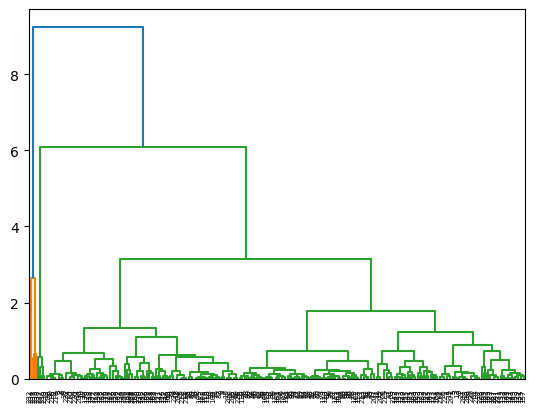

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

### Terlihat bahwa garis cluster terpanjang berada dijumlah cluster 2, 3, 4, atau 5.

---

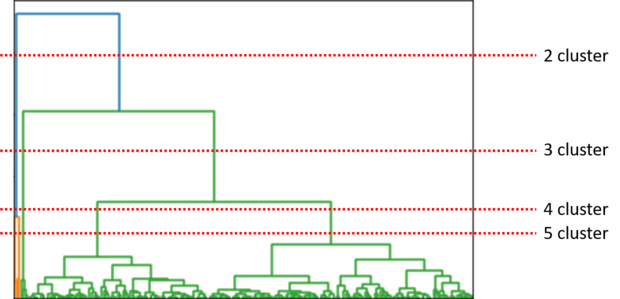

## Modeling

Kita akan coba membuat model menggunakan algoritma Agglomerative Hierarchical Clustering (AHC) dengan:
- 4 cluster
- persamaan jarak menggunakan Euclidean Distance
- menggunakan metode complete linkage


Baca dokumentasi library AHC [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

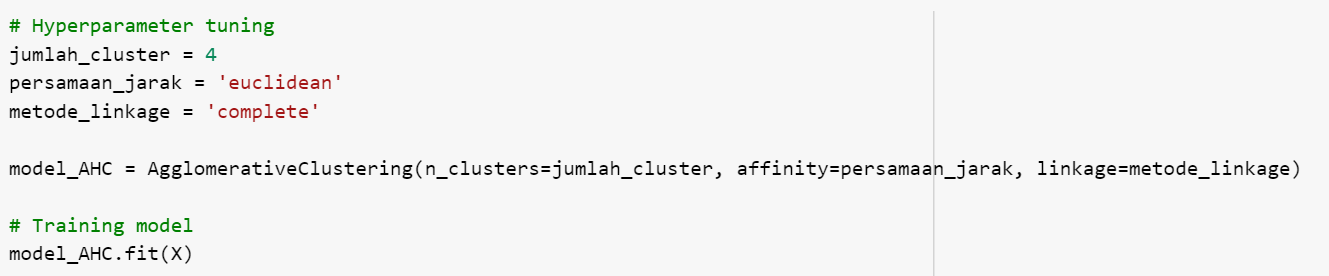

In [ ]:
# Hyperparameter tuning
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, metric=persamaan_jarak, linkage=metode_linkage)

# Training model
model_AHC.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=4)

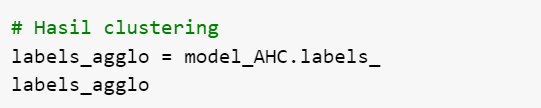

In [ ]:
# Hasil clustering
labels_agglo = model_AHC.labels_
labels_agglo

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 0, 0, 2, 2, 2, 2])

## Visualisasi Hasil Clustering

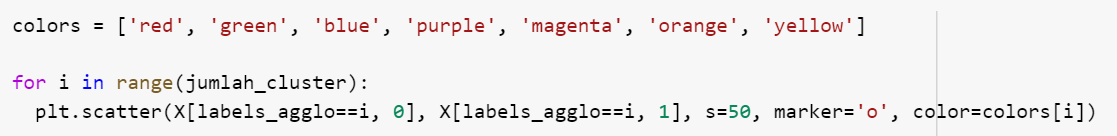

In [ ]:
import matplotlib.pyplot as plt

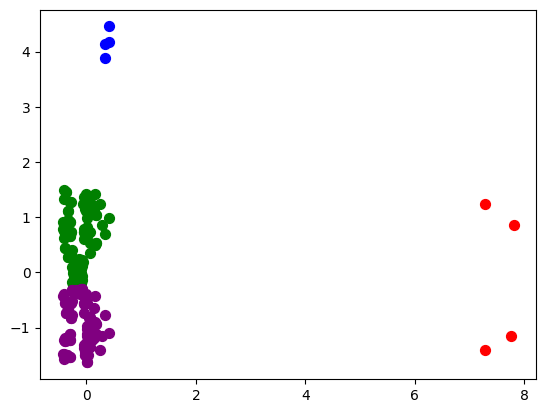

In [ ]:
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])


Kita bisa lihat hasil clusteringnya sudah bagus, terlihat antar cluster cukup terpisah (tidak ada misalnya anggota cluster warna biru berada di tengah2 warna hijau).

Artinya kita bisa menggunakan hasil clustering ini.

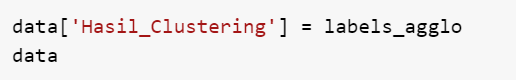

In [ ]:
data['Hasil_Clustering'] = labels_agglo
data


,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,1
3,Female,20,16,6,3
4,Female,23,16,77,1
5,Female,31,17,40,3
...,...,...,...,...,...
209,Female,35,1207,79,0
210,Female,45,126,182,2
211,Male,32,126,174,2


## Kesimpulan

**Contoh**:

Mencari rata-rata tiap cluster untuk menarik kesimpulan.

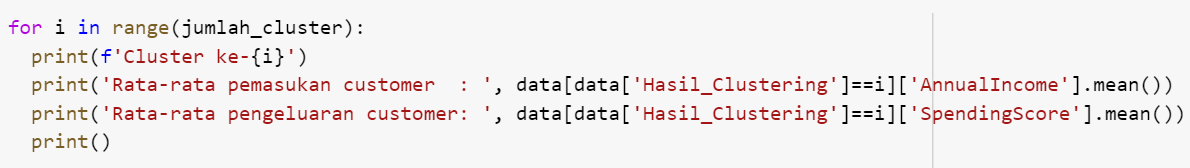

In [ ]:
# Menampilkan rata-rata untuk tiap cluster
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukan customer: ', data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer: ', data[data['Hasil_Clustering'] == i]['SpendingScore'].mean())
    print()

Cluster ke-0
Rata-rata pemasukan customer:  1167.0
Rata-rata pengeluaran customer:  48.5

Cluster ke-1
Rata-rata pemasukan customer:  57.268115942028984
Rata-rata pengeluaran customer:  67.94927536231884

Cluster ke-2
Rata-rata pemasukan customer:  131.5
Rata-rata pengeluaran customer:  182.75

Cluster ke-3
Rata-rata pemasukan customer:  58.40425531914894
Rata-rata pengeluaran customer:  23.74468085106383



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer sangat kaya dan sangat hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 3 adalah kelompok customer menengah ke atas dan boros (pengeluaran lebih besar dari pemasukan)
- Cluster 1 adalah kelompok customer menengah ke bawah dan hemat (pengeluaran lebih kecil dari pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1



1. Coba kombinasi tuning hyperparameter AHC lainnya:
  - jumlah_cluster = 2, 3, 4, 5
  - persamaan_jarak = euclidean, manhattan
  - metode_linkage = single, complete, average

2. Tentukan kombinasi tuning hyperparameter terbaik (selain tuning hyperparameter pada hands-on ini)!

3. Buat kesimpulan clustering menggunakan hyperparameter terbaik!

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import numpy as np

# Asumsikan X adalah data yang digunakan untuk clustering
# Misalnya: X = dataset yang sudah disiapkan sebelumnya

In [ ]:
jumlah_clusters = [2, 3, 4, 5]  # Jumlah cluster yang akan dicoba
persamaan_jarak = ['euclidean', 'manhattan']  # Persamaan jarak yang akan digunakan
metode_linkages = ['single', 'complete', 'average']  # Metode linkage yang akan diuji

In [ ]:
best_score = -1
best_params = None

for n_clusters in jumlah_clusters:
    for metric in persamaan_jarak:
        for linkage in metode_linkages:
            try:
                # Inisialisasi model AHC
                model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)

                # Fit model ke data
                labels = model.fit_predict(X)

                # Jika menggunakan jarak Manhattan, gunakan pairwise_distances
                if metric == 'manhattan':
                    distance_matrix = pairwise_distances(X, metric=metric)
                    score = silhouette_score(distance_matrix, labels, metric="precomputed")
                else:
                    score = silhouette_score(X, labels, metric=metric)

                # Periksa jika hasil saat ini lebih baik dari hasil terbaik sebelumnya
                if score > best_score:
                    best_score = score
                    best_params = (n_clusters, metric, linkage)

                print(f"Kombinasi Berhasil: n_clusters={n_clusters}, metric={metric}, linkage={linkage}, Silhouette Score={score:.4f}")

            except Exception as e:
                print(f"Error dengan kombinasi: n_clusters={n_clusters}, metric={metric}, linkage={linkage}")
                print(f"Pesan Error: {e}")

# Periksa apakah ada hasil terbaik yang ditemukan
if best_params is not None:
    print("\nKombinasi Hyperparameter Terbaik:")
    print(f"Jumlah Cluster: {best_params[0]}")
    print(f"Persamaan Jarak: {best_params[1]}")
    print(f"Metode Linkage: {best_params[2]}")
    print(f"Silhouette Score: {best_score}")
else:
    print("Tidak ada kombinasi hyperparameter yang valid ditemukan.")

Kombinasi Berhasil: n_clusters=2, metric=euclidean, linkage=single, Silhouette Score=0.8544
Kombinasi Berhasil: n_clusters=2, metric=euclidean, linkage=complete, Silhouette Score=0.8544
Kombinasi Berhasil: n_clusters=2, metric=euclidean, linkage=average, Silhouette Score=0.8544
Kombinasi Berhasil: n_clusters=2, metric=manhattan, linkage=single, Silhouette Score=0.8538
Kombinasi Berhasil: n_clusters=2, metric=manhattan, linkage=complete, Silhouette Score=0.8538
Kombinasi Berhasil: n_clusters=2, metric=manhattan, linkage=average, Silhouette Score=0.8538
Kombinasi Berhasil: n_clusters=3, metric=euclidean, linkage=single, Silhouette Score=0.7521
Kombinasi Berhasil: n_clusters=3, metric=euclidean, linkage=complete, Silhouette Score=0.7521
Kombinasi Berhasil: n_clusters=3, metric=euclidean, linkage=average, Silhouette Score=0.7521
Kombinasi Berhasil: n_clusters=3, metric=manhattan, linkage=single, Silhouette Score=0.7426
Kombinasi Berhasil: n_clusters=3, metric=manhattan, linkage=complete, S

In [ ]:
# Cek apakah ada hyperparameter terbaik sebelum inisialisasi model terbaik
if best_params is not None:
    # Inisialisasi model terbaik
    model_terbaik = AgglomerativeClustering(n_clusters=best_params[0], linkage=best_params[2], metric=best_params[1])
    labels_terbaik = model_terbaik.fit_predict(X)

    # Menampilkan hasil clustering
    for i in range(best_params[0]):
        print(f"Cluster ke-{i}")
        print(f"Rata-rata pemasukan customer: {data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean()}")
        print(f"Rata-rata pengeluaran customer: {data[data['Hasil_Clustering'] == i]['SpendingScore'].mean()}")
        print()
else:
    print("Tidak ada kombinasi hyperparameter terbaik yang ditemukan.")

Cluster ke-0
Rata-rata pemasukan customer: 1167.0
Rata-rata pengeluaran customer: 48.5

Cluster ke-1
Rata-rata pemasukan customer: 57.268115942028984
Rata-rata pengeluaran customer: 67.94927536231884



## Activity 2


1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima AHC (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

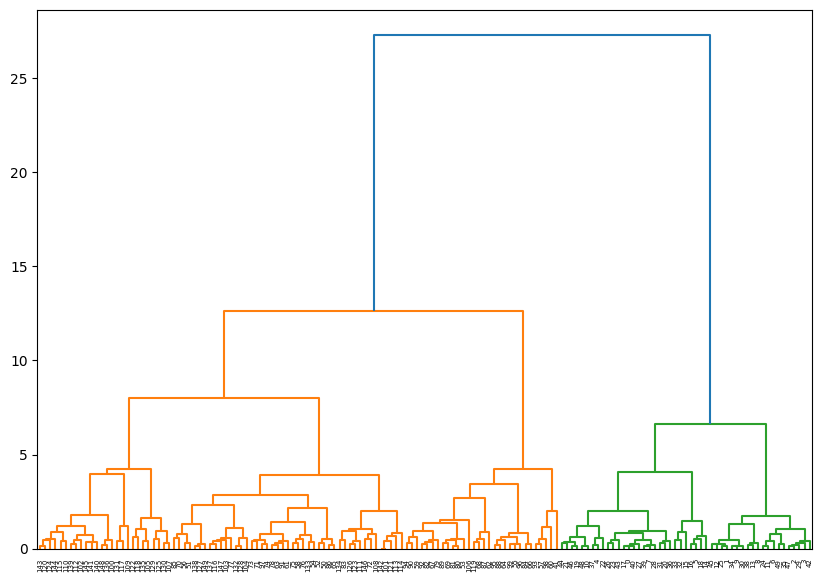

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Contoh menggunakan dataset iris
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat linkage matrix menggunakan metode 'ward'
linked = linkage(X_scaled, 'ward')

# Plot dendrogram untuk melihat hierarki clustering
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

# Melakukan Agglomerative Clustering tanpa argumen 'affinity'
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = ahc.fit_predict(X_scaled)

# Menambahkan hasil clustering ke dalam dataset
df = pd.DataFrame(X, columns=data.feature_names)
df['cluster'] = clusters

# Tampilkan hasil clustering
print(df.head())
